# SVD Demonstration

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## What this is about:

You will see how ...

- The SVD can be use to reduce the dimensionality of a data set
- This workflow can be implemented in `numpy`.

As usual our emphasis will be on *doing* rather than *proving*:
*just enough: progress at pace*


## Assigned Reading


This worksheet is self-contained given the material we have already covered.


## Remembering $k$-NN for *penguins*

We're going to recall how we used the $k$-NN's algorithm to predict penguin species
from four columns of numerical data. 

After we cleaned up the data set by removing the NaN's we were left with $333$ rows of
data - one row for each penguin. The four columns therefore total to $4\times 333 = 1332$
individual items of data. Some of this is held back for testing, so the training data
set size isn't actually this big, but we do need all of this for training and testing.

This is a very modest size when compared to some data sets. Later we will see the
MNIST data set of digitized handwritten numerals, $0,1,2,\ldots,9$.

There are $70,000$ examples in numerical MNIST, and each example requires $28^2=784$
numbers. The dataset therefore comprises
$70,000\times 28^2=54,880,000$ - **54 million** - numbers.

It is useful to be able to reduce the amount of data down to just *its essence*. This
results in less computer memory needed, and faster computing times - because there is
less to do.

### Motivation

So, the example below is hopefully quite easy to follow when set in the context of
our previous sessions. The data set here is quite small, but the idea and technique
we present is quite general.

Let's start with our standard imports

### In This Notebook WE WILL COMMIT a DATA SCIENCE CRIME

Will you be able to spot it?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

We'll bring in the penguins data as before, clean it up,
and re-implement our $k$-NN classifier.

In [3]:
dfp = sns.load_dataset('penguins')
dfp2 = dfp.dropna()
dfp2.isna().sum()
dfp2 = dfp2.reset_index(drop=True)
print(dfp2.shape)

(333, 7)


In [4]:
dfp.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We are going to repeat our example where we used the $k$-NN classifier to
predict the species in column zero from the numerical data in columns
3 - 6 (indexed as 2 - 5).

Here is that code again...

We fit the model using the Manhattan metric:
$\Vert\boldsymbol{x}^* - \boldsymbol{x}_i\Vert_1$, 
and then plot the confusion matrix and performance data. 

In [6]:
# create our labelled training and test data sets with 60/40 train/test split
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# obtain the classifier and fit it using 2 nearest neighbours
# and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)# Now use the fitted model from the training data to predict
# from the test data.
y_pred = classifier.predict(X_test)

In [7]:
# create a confusion matrix to assess the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(cm)
accsc = accuracy_score(y_test,y_pred);
print("Accuracy:", accsc)

Confusion Matrix:
[[45  0  0]
 [ 4 26  0]
 [ 0  0 59]]
Accuracy: 0.9701492537313433


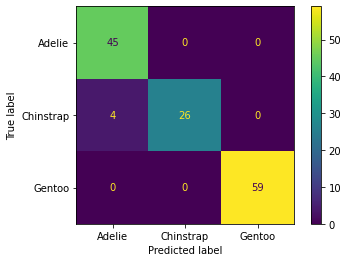

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

In the above we extracted the columns of input data into a numpy array.

The array is called `X`. Here are the details

In [9]:
print(' The data type of X: ', type(X))
print('     The shape of X: ', X.shape)
print('The first four rows:\n', X[0:4,:])
print('  The last two rows:\n', X[-2:,:])

 The data type of X:  <class 'numpy.ndarray'>
     The shape of X:  (333, 4)
The first four rows:
 [[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 [  36.7   19.3  193.  3450. ]]
  The last two rows:
 [[  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


## Dimensionality Reduction

Can we get by with less data?

We saw an example earlier, when we introduced binary classifiers, where we
used just two columns, *bill depth* and *body mass* to predict gender.

That's useful - four columns of data are instantly halved into just two.

But we may have lost valuable infomation that was present in those
dropped columns.

**Can we drop half the columns but keep all the information?**

Well, not quite, but we have see how we can approximate matrices using 
eigenvalues (square matrices only) or singular values.

Here, `X` is a non-square matrix so we can take its SVD...

The SVD of `X` can be obtained from `np.linalg.svd()` as we now show.

We also see below that `@` can be used for matrix multiplication: `A @ B`.

In [10]:
U, S, VT = np.linalg.svd(X, full_matrices=False) # full_matrices=False - discussed later
print("     U's  shape: ", U.shape)
print("     VT's shape: ", VT.shape)
print("      S's shape: ", S.shape)
print("             S = ", S)
print("diag(S)'s shape: ", np.diag(S).shape)
print("allclose? (T/F): ", np.allclose(X, U @ np.diag(S) @ VT), end=' - ')
print("|| X-U @ np.diag(S) @ VT || = ", np.linalg.norm( X-U @ np.diag(S) @ VT ) )

     U's  shape:  (333, 4)
     VT's shape:  (4, 4)
      S's shape:  (4,)
             S =  [7.82505416e+04 4.99884015e+02 7.40457786e+01 4.18409792e+01]
diag(S)'s shape:  (4, 4)
allclose? (T/F):  True - || X-U @ np.diag(S) @ VT || =  1.862284009018728e-11


Look at the singular values. 
- They are always non-negative and `numpy` gives them to us in descending order.
- What do you notice about them? Can you introduce the notion of **importance**?
- Graphics will help us... Let's use a bar chart (sometimes termed a *scree* plot).

S =  [7.82505416e+04 4.99884015e+02 7.40457786e+01 4.18409792e+01]


<BarContainer object of 4 artists>

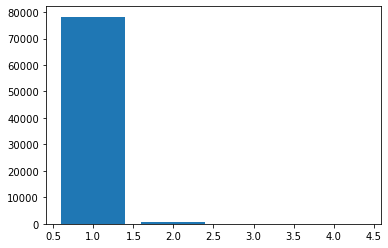

In [11]:
# in some contexts this is related to a scree plot
print("S = ", S)
plt.bar([1,2,3,4],S)

S =  [7.82505416e+04 4.99884015e+02 7.40457786e+01 4.18409792e+01]


<BarContainer object of 4 artists>

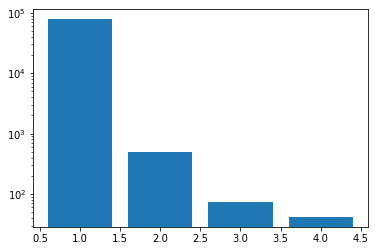

In [12]:
# a log scale is sometimes preferable...
print("S = ", S)
plt.bar([1,2,3,4],S,log=True)

We have seen for the SVD that we can write, in general,
$$
\boldsymbol{B} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
=\sum_{j=1}^{p} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T
$$

In this $p$ is the rank of the matrix $\boldsymbol{B}$. 

Let's apply this to $\boldsymbol{X}$.

Note: this is one of the times where we're using a symmetric letter,
$\boldsymbol{X}$, to denote a non-symmetric matrix. It can't be 
helped - this use of `X` is very standard in Machine Learning and
it isn't wise to go against it.

Using the SVD for $\boldsymbol{X}$ we have,
$$
\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T
=\sum_{j=1}^{p} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T
$$
and we'll show below that $p=4$. We can examine these approximations:

- $\boldsymbol{X}_n = \sum_{j=1}^{n} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T$

for $n=1,2,\ldots$. Think of $n$ as being the number of columns we retain in
our data set. We'll elaborate later.

In worksheet B you were encouraged to look up and use a python loop.
We'll use that here, it has the form:

```
for k in range(0,3):
  do something with k = 0,1,2 in turn
now carry on with something else
```

In [13]:
# set up a zero matrix to hold the approximations X1, X2, ...
Xc = np.zeros(X.shape)
print('The norm of X is    ', np.linalg.norm( X ) )
# take more and more terms in the SVD expansion - starting with none
for nc in range(0,1+S.shape[0]):
  Xc = U[:, :nc] @ np.diag(S[:nc]) @ VT[:nc, :]
  print('The norm of X-Xc is ',np.linalg.norm( X-Xc ) )
print('X-Xc is close to zero (T/F)...', np.allclose(X,Xc))

The norm of X is     78252.18454350013
The norm of X-Xc is  78252.18454350013
The norm of X-Xc is  507.06752386361745
The norm of X-Xc is  85.04966116997144
The norm of X-Xc is  41.84097917907918
The norm of X-Xc is  1.862284009018728e-11
X-Xc is close to zero (T/F)... True


We can see that the norm (size) of $\boldsymbol{X}-\boldsymbol{X}_1$ drops
from $78,252$ to $507$, this is just $507/78252 = 0.7\%$ of the size 
of $\boldsymbol{X}$.

This suggests that almost all the information contained in the four columns
of penguins data is captured in just the first rank one SVD approximation.

We see that $\boldsymbol{X}-\boldsymbol{X}_4$ is essentially zero. Telling us
that $\boldsymbol{X}$ is indeed a rank 4 matrix.

Here is a simpler way to code it. Recall that 

$$
\boldsymbol{X}_n
= \sum_{j=1}^{n} \sigma_j \boldsymbol{u}_j\boldsymbol{v}_j^T
= \sigma_1 \boldsymbol{u}_1\boldsymbol{v}_1^T
+ \sigma_2 \boldsymbol{u}_2\boldsymbol{v}_2^T
+ \cdots
+ \sigma_n \boldsymbol{u}_n\boldsymbol{v}_n^T
$$

the full expansion on the right of that expression can be emulated like this...

In [14]:
Xc = np.zeros(X.shape)
Xc = Xc + S[0]*U[:,0:1] @ VT[0:1,:]
print(np.linalg.norm(X - Xc))
Xc = Xc + S[1]*U[:,1:2] @ VT[1:2,:]
print(np.linalg.norm(X - Xc))
Xc = Xc + S[2]*U[:,2:3] @ VT[2:3,:]
print(np.linalg.norm(X - Xc))
Xc = Xc + S[3]*U[:,3:4] @ VT[3:4,:]
print(np.linalg.norm(X - Xc))

507.06752386361745
85.04966116997144
41.84097917907918
1.8955341028962172e-11


Or we could use a loop - to emulate the summation symbol

In [15]:
Xc = np.zeros(X.shape)
nc = 4
for k in range(0, nc):
  Xc = Xc + S[k] * U[:,[k]] @ VT[[k],:]
  print(np.linalg.norm( X-Xc ) )

507.06752386361745
85.04966116997144
41.84097917907918
1.8955341028962172e-11


We can now go back to the $k$-NN code and use this reduced data set 
in place of the full four columns.

Remember: **we expect that the SVD has provided the essence of the four columns in less space**

We will use the loop as above, and examine the performance of the classifier
as it depends on `nc`.

We'll set up a `numpy` array to store the accuracy score for each choice of `nc`.

In [16]:
accarray = np.zeros([4])

In [17]:
#X = dfp2.iloc[:, 2:6].values # we don't use the raw data this time
Xc = np.zeros(X.shape)
nc = 3
for k in range(0, nc):
  Xc = Xc + S[k] * U[:,[k]] @ VT[[k],:]
y = dfp2.iloc[:, 0].values                         # Xc needed below
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.40)
# scale the data
scaler = StandardScaler(); scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# obtain classifier, fit using 2 NN's and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)
# predict from the test data.
y_pred = classifier.predict(X_test)
# create a confusion matrix to assess the performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(cm)
accsc = accuracy_score(y_test,y_pred); print("Accuracy:", accsc)
print('nc = ', nc, ', ||X-Xc|| = ', np.linalg.norm(X - Xc))
# store the accuracy scores in a python list for nc=1,2,3,4
accarray[nc-1] = accsc

Confusion Matrix:
[[50  0  1]
 [ 5 26  0]
 [ 0  0 52]]
Accuracy: 0.9552238805970149
nc =  3 , ||X-Xc|| =  41.84097917907918


A plot of the accuracy dependence on the number of singular values in
use would be easier on the eye...

*NOTE: this will not make sense in the static PDF, HTML versions as it will only have run once*

[0.         0.         0.95522388 0.        ]


(0.0, 1.0)

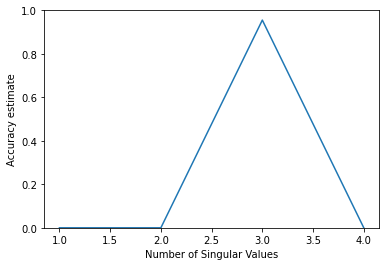

In [18]:
print(accarray)
plt.plot([1,2,3,4], accarray)
plt.xlabel('Number of Singular Values')
plt.ylabel('Accuracy estimate')
plt.ylim([0,1])

**Comments?**

### Have you SPOTTED THE CRIME YET?

### Review

We are now making a lot of progress. We have seen our how our first machine learning
algorithm, $k$-NN's, can be configured and used, how to deal with data using 
`seaborn` (with `pandas` in tha background), deal with plots using `matplotlib` and 
deal with number crunching vectors and matrices with `numpy`. All of this is within
the convenient wrapper of the `python` programming language.

In the last example we are also starting to see how we can manipulate and transform 
data to ask whether we need all of it or not. 

We have seen a very important technique, but what value of `nc` should we use?

To answer such questions we need to think about what it is we are most interested in 
knowing.

For example, here is our confusion matrix for the last computation:


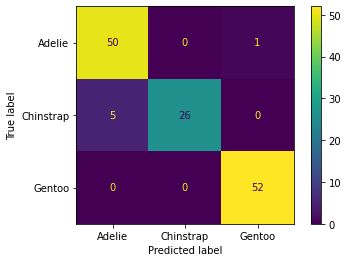

In [19]:
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

Consider these questions:

1. Suppose a Chinstrap was prediced? What's the chance that it's an Adelie or Gentoo?
1. What's the chance the prediction is correct?
1. Which species are predicted most accurately?
1. What is the probability that a Gentoo is incorrectly predicted?

Have a think, How could you use the confusion matrix to answer these?

What we need here is **Probability** and, later, **statistics**.

They are the means by which we assert a *strength of belief* (probability) 
as well as describe results and make inferences with confidence (statistics).

Next we'll get on to reviewing some essential parts of those areas but beforehand
we want to close with some technical observations regarding the SVD.

## SVD: The Singular Value Decomposition - some technicalities

Let $\boldsymbol{K}$ be an $n$-row by $m$-column matrix of real numbers.
Then $\boldsymbol{K} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$ -
this is called the *Singular Value Decomposition* of $\boldsymbol{K}$.
In this:

-   $\boldsymbol{U}$ is an $n\times n$ *orthogonal square* matrix
-   $\boldsymbol{\Sigma}$ is an $n\times m$ *rectangular diagonal*
    matrix
-   $\boldsymbol{V}^T$ is an $m\times m$ *orthogonal square* matrix

The entries on the diagonal of $\boldsymbol{\Sigma}$ are called the
*singular values* of $\boldsymbol{K}$ and the number of non-zero
singular values gives the rank of $\boldsymbol{K}$.
The columns of $\boldsymbol{U}$ (resp. $\boldsymbol{V}$) are called the
left (resp. right) singular vectors of $\boldsymbol{K}$.

Let's look at the shapes of the matrices we have been using: we had
$\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$.

In [20]:
print('The shape of X  is: ', X.shape, '\t we knew this')
print('The shape of U  is: ', U.shape, '\t seems WRONG')
print('The shape of S  is: ', S.shape, '\t seems WRONG')
print('The shape of VT is: ', VT.shape,'\t seems OK')

The shape of X  is:  (333, 4) 	 we knew this
The shape of U  is:  (333, 4) 	 seems WRONG
The shape of S  is:  (4,) 	 seems WRONG
The shape of VT is:  (4, 4) 	 seems OK


What's going on? Pictures will help...

Given $\boldsymbol{K} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$, with 
`S` for $\boldsymbol{\Sigma}$, and using `+` to denote the non-zero diagonal
elements, the shapes of these depend on the shape of $\boldsymbol{K}$

For $n=m$ they are,

```
.---------.    .---------. +---------. .---------. 
|         |    |         | | +       | |         | 
|    K    | =  |    U    | |    +    | |   V^T   | 
|         |    |         | | S     + | |         |  
'---------'    '---------' '---------+ '---------'
```
This is the 'easy case' - it's just the eigenvalue problem ($\boldsymbol{K}$
need not be symmetric). There are two other cases...

For $n>m$ the shapes are,

```
.---------.    .------------------. +---------. .---------. 
|         |    |                  | | +       | |         | 
|         |    |                  | |   +     | |   V^T   | 
|         | =  |                  | |     +   | |         | 
|    K    |    |        U         | |       + | '---------'  
|         |    |                  | |         |  
|         |    |                  | |         |  
|         |    |                  | |  S      |  
'---------'    '------------------' '---------' 

```

For $n<m$ the shapes are,

```
.------------------.    .---------. +------------------. .------------------. 
|                  |    |         | | +         S      | |                  | 
|        K         | =  |    U    | |   +              | |                  | 
|                  |    |         | |     +            | |                  |
'------------------'    '---------' '-------+----------' |       V^T        |
                                                         |                  |
                                                         |                  |
                                                         |                  |
                                                         '------------------'
```
In each case $\boldsymbol{S}$ mas a **zero submatrix**. We've seen this in our earlier example:

We have seen this example of
$\boldsymbol{K} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$ before:

$$
\text{If }
\boldsymbol{K}=\left(\begin{array}{rrr}
1  &  2 & 5 \\
5  & -6 & 1 \\
\end{array}\right)
\text{ then }
\boldsymbol{U}=\left(\begin{array}{rr}
  -0.06213\ldots  & 0.99806\ldots \\
   0.99806\ldots  & 0.06213\ldots \\
\end{array}\right),
$$


$$
\boldsymbol{\Sigma}=\left(\begin{array}{lll}
7.88191\ldots &                 0 & 0 \\
0                 & 5.46584\ldots & 0 \\
\end{array}\right)
\text{ and }
\boldsymbol{V}=\left(\begin{array}{rrr}
 0.62525\ldots & 0.23944\ldots &-0.74278\ldots \\
-0.77553\ldots & 0.29699\ldots &-0.55708\ldots \\
 0.08720\ldots & 0.92437\ldots & 0.37139\ldots \\
\end{array}\right)
$$

If we use these we can indeed check that


\begin{align}
&
\!\!\!\!\!\!\!\!\!\!\!
\!\!\!\!\!\!\!\!\!\!\!
\!\!\!\!\!\!\!\!\!\!\!
\left(\begin{array}{rr}
  -0.062\ldots  & 0.998\ldots \\
   0.998\ldots  & 0.062\ldots \\
\end{array}\right)
\left(\begin{array}{lll}
7.881\ldots &                 0 & 0 \\
0                 & 5.465\ldots & 0 \\
\end{array}\right)
\left(\begin{array}{rrr}
 0.625\ldots & 0.239\ldots &-0.742\ldots \\
-0.775\ldots & 0.296\ldots &-0.557\ldots \\
 0.087\ldots & 0.924\ldots & 0.371\ldots \\
\end{array}\right)^T
\\
&\qquad{} =
\left(\begin{array}{rrr}
1  &  2 & 5 \\
5  & -6 & 1 \\
\end{array}\right)
\end{align}

But look at the last column of $\boldsymbol{S}$. It doesn't give us anything...

Let's remove it... It means we have lose the last column of $\boldsymbol{V}^T$ 
(i.e. the last row of $\boldsymbol{V}$) as well...

\begin{align}
&
\!\!\!\!\!\!\!\!\!\!\!
\!\!\!\!\!\!\!\!\!\!\!
\!\!\!\!\!\!\!\!\!\!\!
\left(\begin{array}{rr}
  -0.062\ldots  & 0.998\ldots \\
   0.998\ldots  & 0.062\ldots \\
\end{array}\right)
\left(\begin{array}{ll}
7.881\ldots &                 0  \\
0                 & 5.465\ldots  \\
\end{array}\right)
\left(\begin{array}{rrr}
 0.625\ldots & 0.239\ldots &-0.742\ldots \\
-0.775\ldots & 0.296\ldots &-0.557\ldots \\
\end{array}\right)^T
\\
&\qquad{} =
\left(\begin{array}{rrr}
1  &  2 & 5 \\
5  & -6 & 1 \\
\end{array}\right)
\end{align}

We still have $\boldsymbol{K}$. Surprised? Let's check this in `numpy`... 

In [21]:
K = np.array([[1,2,5],[5,-6,1]])
U, S, VT = np.linalg.svd(K)
S1 = np.array([ [7.88191, 0], [0, 5.46584]])
V1 = np.array([ [0.625, 0.239],[-0.775, 0.297],[0.087,0.924]])
print( U @ S1 @ V1.T)
print(K)

[[ 0.99771032  1.99978285  4.99806744]
 [ 4.99784675 -5.99580514  0.99822226]]
[[ 1  2  5]
 [ 5 -6  1]]


Convinced? These numbers are just close because of the low precision 
we used. We'll see how to do this properly below.

What we have discovered here is the *Thin SVD*. It works like this...

For $n>m$ we lose columns on the right of $\boldsymbol{U}$ to form $\boldsymbol{U_1}$,
and rows at the bottom of $\boldsymbol{S}$ to form $\boldsymbol{S}_1$

```
.---------.    .------------------. +---------. .---------. 
|         |    |             "    | | +       | |         | 
|         |    |             "    | |   +     | |   V^T   | 
|         | =  |             "    | |     +   | |         | 
|    K    |    |        U1   "    | | S1    + | '---------'  
|         |    |             "    | |"""""""""|  
|         |    |             "    | |         |  
|         |    |             "    | |         |  
'---------'    '------------------' '---------' 

```

For $n<m$ we lose columns on the right of $\boldsymbol{S}$ to form $\boldsymbol{S_1}$,
and columns at the right of $\boldsymbol{V}$ to form $\boldsymbol{V}_1$

```
.------------------.    .---------. +------------------. .------------------. 
|                  |    |         | | +   S1 "         | |                  | 
|        K         | =  |    U    | |   +    "         | |      V1^T        | 
|                  |    |         | |     +  "         | |                  |
'------------------'    '---------' '-------+"---------' |                  |
                                                         |""""""""""""""""""|
                                                         |                  |
                                                         |                  |
                                                         '------------------'
```

Let's look at this in code... First get the SVD and look at what is returned...

In [22]:
K = np.array([[1,2,5],[5,-6,1]])
U, S, VT = np.linalg.svd(K)
print(U)
print(S)
print(VT)

[[-0.06213744  0.9980676 ]
 [ 0.9980676   0.06213744]]
[7.88191065 5.4658471 ]
[[ 0.62525456 -0.77553283  0.08720987]
 [ 0.23944227  0.29699158  0.9243719 ]
 [-0.74278135 -0.55708601  0.37139068]]


Here `S` is already truncated so we jusy use `np.diag(S)` to make
it square. Also, as it is $\boldsymbol{V}^T$ and
not $\boldsymbol{V}$ that is returned, we just have to slice the top 
two rows. 

In [23]:
print(K)
print(U @ np.diag(S) @ VT[0:2,:])
print('K - U @ np.diag(S) @ VT[0:2,:] is zero (T/F): ', np.allclose(K, U @ np.diag(S) @ VT[0:2,:]) )

[[ 1  2  5]
 [ 5 -6  1]]
[[ 1.  2.  5.]
 [ 5. -6.  1.]]
K - U @ np.diag(S) @ VT[0:2,:] is zero (T/F):  True


Suppose that we wanted to work with the full SVD, with all zeros included?

Well, we show this by example. First, note two things:

- `np.linalg.svd` returns $\boldsymbol{V}^T$, not $\boldsymbol{V}$.  
- The shape of `S` doesn't agree with $\boldsymbol{\Sigma}$.

So, we'll need to pad `S` - and then we can check the reconstruction $\boldsymbol{K} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$.

The padding is a bit awkward - here it is...

In [24]:
S = np.hstack(( np.diag(S), np.zeros((2,1)) ))
print(S)

[[7.88191065 0.         0.        ]
 [0.         5.4658471  0.        ]]


Now we can check the reconstruction
$\boldsymbol{K} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$.
It is zero (to machine precision), as expected...

In [25]:
print(K - U @ S @ VT)

[[-4.44089210e-16 -4.44089210e-16 -1.77635684e-15]
 [-8.88178420e-16  1.77635684e-15  1.11022302e-16]]


Lastly: earlier we said we would explain `full_matrices=False` ...

In [26]:
U, S, VT = np.linalg.svd(K, full_matrices=False)
print(U)
print(S)
print(VT)

[[-0.06213744  0.9980676 ]
 [ 0.9980676   0.06213744]]
[7.88191065 5.4658471 ]
[[ 0.62525456 -0.77553283  0.08720987]
 [ 0.23944227  0.29699158  0.9243719 ]]


In [27]:
U, S, VT = np.linalg.svd(K, full_matrices=True)
print(U)
print(S)
print(VT)

[[-0.06213744  0.9980676 ]
 [ 0.9980676   0.06213744]]
[7.88191065 5.4658471 ]
[[ 0.62525456 -0.77553283  0.08720987]
 [ 0.23944227  0.29699158  0.9243719 ]
 [-0.74278135 -0.55708601  0.37139068]]


With `False` the unwanted columns (or rows) of $\boldsymbol{V}$ (or
$\boldsymbol{V}^T$) aren't returned - but `S` is still not a matrix!

## Review

There is a great deal that can be said about the SVD, but we're going to
stay narrowly focussed and leave it here.

- We have indicated its value in data science and machine learning for
dimensionality reduction.

- We have shown how to work with the *thin SVD* and the *full SVD* in
`numpy`


### How about THAT CRIME?

We used the test data in the SVD. Is that allowed?

# HOMEWORK REMINDER - very important


In the lab we are going to see how the SVD can be used to compress data. 

We'll use **image compression** as an example:
take a good quality jpeg colour photo (e.g. on your phone) of something vivid,
detailed and colourful and save it on your account (One Drive, for example)
so that your Jupyter notebook in Anaconda can use it.

We are going to use the SVD to compress the image.

**We may have already done this** - it will depend on the timetable.

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook four times to populate `accarray` and get a plot
- Create html slide show:
  - `jupyter nbconvert --to slides 8_svddemo.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [28]:
%%bash
NBROOTNAME='8_svddemo'
OUTPUTTING=1

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pys
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook 8_svddemo.ipynb to html
[NbConvertApp] Writing 648718 bytes to 8_svddemo.html
[NbConvertApp] Converting notebook 8_svddemo.ipynb to pdf
[NbConvertApp] Writing 69150 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 106534 bytes to 8_svddemo.pdf
[NbConvertApp] Converting notebook 8_svddemo.ipynb to script
[NbConvertApp] Writing 26095 bytes to 8_svddemo.py
